## IS 445 Final Project (Fall 2023)
Group 5: Xinzhe Miao (xinzhem2), Wenjin Duan (wenjind2), Yuxi Tian (yuxit2)

In [1]:
# Import the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import geopandas as gpd
import shapely.wkt
import contextily as ctx
import bqplot
import ipywidgets
from ipywidgets import VBox, Layout, HBox
from bqplot.interacts import BrushIntervalSelector


### Dataset 1

In [2]:
file = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file)
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,2746.0,4.0,22.0
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3009.0,7.0,4.0
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,3009.0,7.0,21.0
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,3007.0,2.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153825,1N4AZ0CP0D,San Juan,Eastsound,WA,98245.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,POINT (-122.907229 48.7016716),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10,3211.0,2.0,43.0
153826,5YJSA1E27H,Spokane,Spokane,WA,99223.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...,5.306301e+10,3214.0,5.0,9.0
153827,1G1FW6S03P,King,Seatac,WA,98188.0,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,244720059,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.0,9.0,36.0
153828,3FMTK3SU1M,King,Kent,WA,98031.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.0,9.0,46.0


In [3]:
# Summary data
summary_statistics = df.describe()

# Value counts for the 'Make' column
make_value_counts = df['Make'].value_counts()

# Value counts for the 'Electric Vehicle Type' column
ev_type_counts = df['Electric Vehicle Type'].value_counts()

# Missing values
missing_values = df.isnull().sum()

summary_statistics, make_value_counts, ev_type_counts, missing_values

(         Postal Code     Model Year  Electric Range      Base MSRP  \
 count  153827.000000  153830.000000   153830.000000  153830.000000   
 mean    98171.496226    2020.100780       65.727673    1273.032276   
 std      2437.224154       3.019617       95.147219    9086.044139   
 min      1730.000000    1997.000000        0.000000       0.000000   
 25%     98052.000000    2018.000000        0.000000       0.000000   
 50%     98122.000000    2021.000000       17.000000       0.000000   
 75%     98370.000000    2023.000000       84.000000       0.000000   
 max     99577.000000    2024.000000      337.000000  845000.000000   
 
        Legislative District  DOL Vehicle ID  2020 Census Tract       Counties  \
 count         153491.000000    1.538300e+05       1.538270e+05  153220.000000   
 mean              29.302558    2.124161e+08       5.297335e+10    2948.177810   
 std               14.828506    8.054800e+07       1.620212e+09     445.460753   
 min                1.000000   

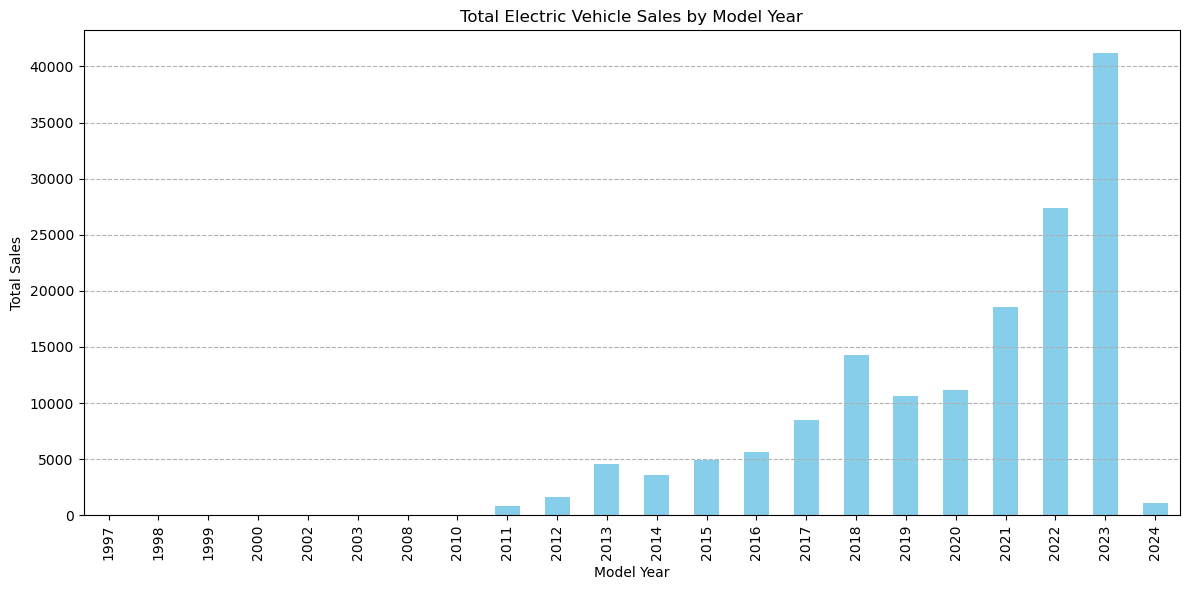

In [4]:
# Plot 1: Total Electric Vehicle Sales by Model Year
# Aggregate the data to get the total sales (counts) for each model year
total_sales_by_year = df.groupby('Model Year').size()

# Create a bar plot for the total sales by year
plt.figure(figsize=(12, 6))
total_sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Electric Vehicle Sales by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


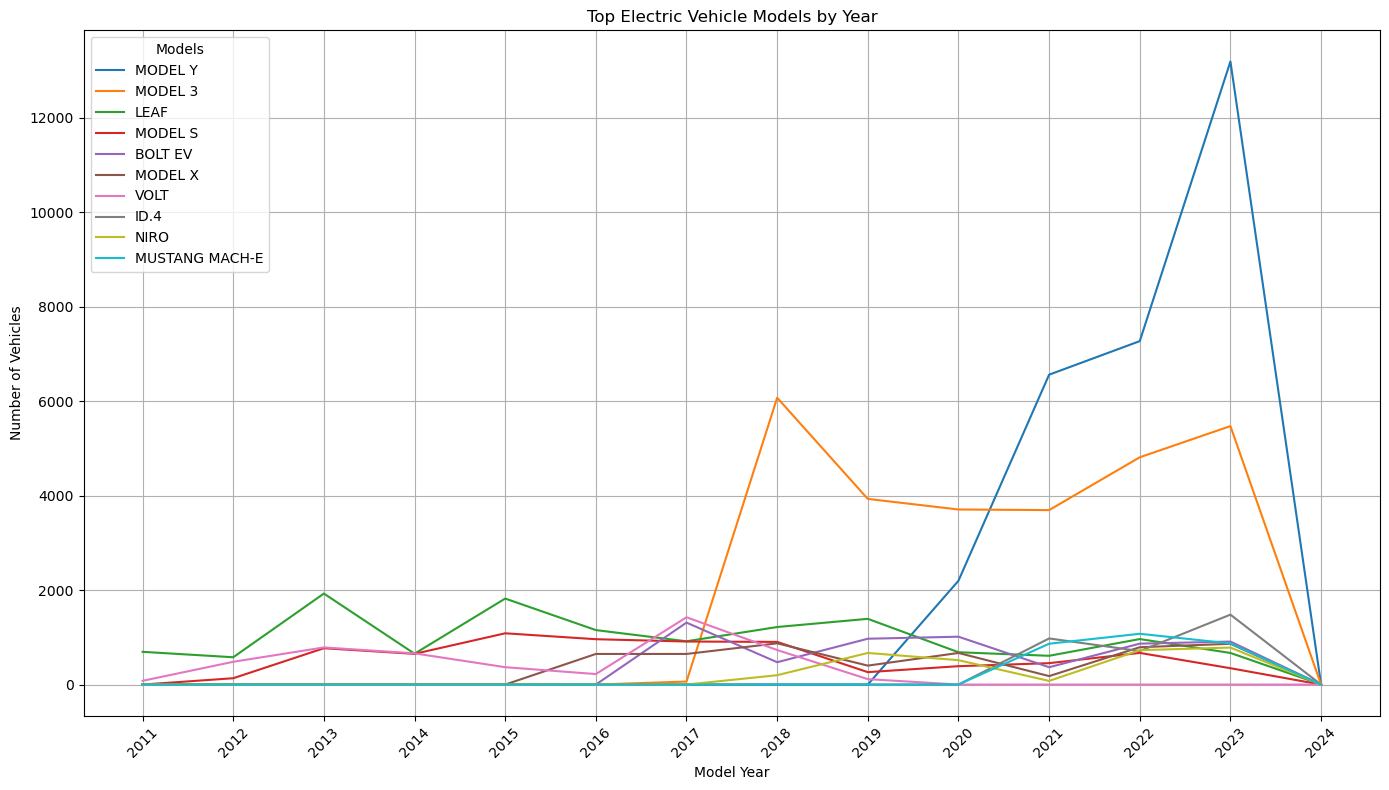

In [5]:
# Plot 2: Top Electric Vehicle Models by Year
# First, let's determine the top models by overall count
top_models = df['Model'].value_counts().head(10).index.tolist()

# Now let's filter the data for these top models and aggregate by year
top_models_data = df[df['Model'].isin(top_models)]
top_models_yearly = top_models_data.groupby(['Model Year', 'Model']).size().unstack(fill_value=0)

# Display the aggregated data for top models by year
top_models_yearly

# Plotting the top models across each year
plt.figure(figsize=(14, 8))

# Plot each model as a separate line
for model in top_models:
    plt.plot(top_models_yearly.index, top_models_yearly[model], label=model)

plt.title('Top Electric Vehicle Models by Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Models')
plt.grid(True)
plt.xticks(top_models_yearly.index, rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()

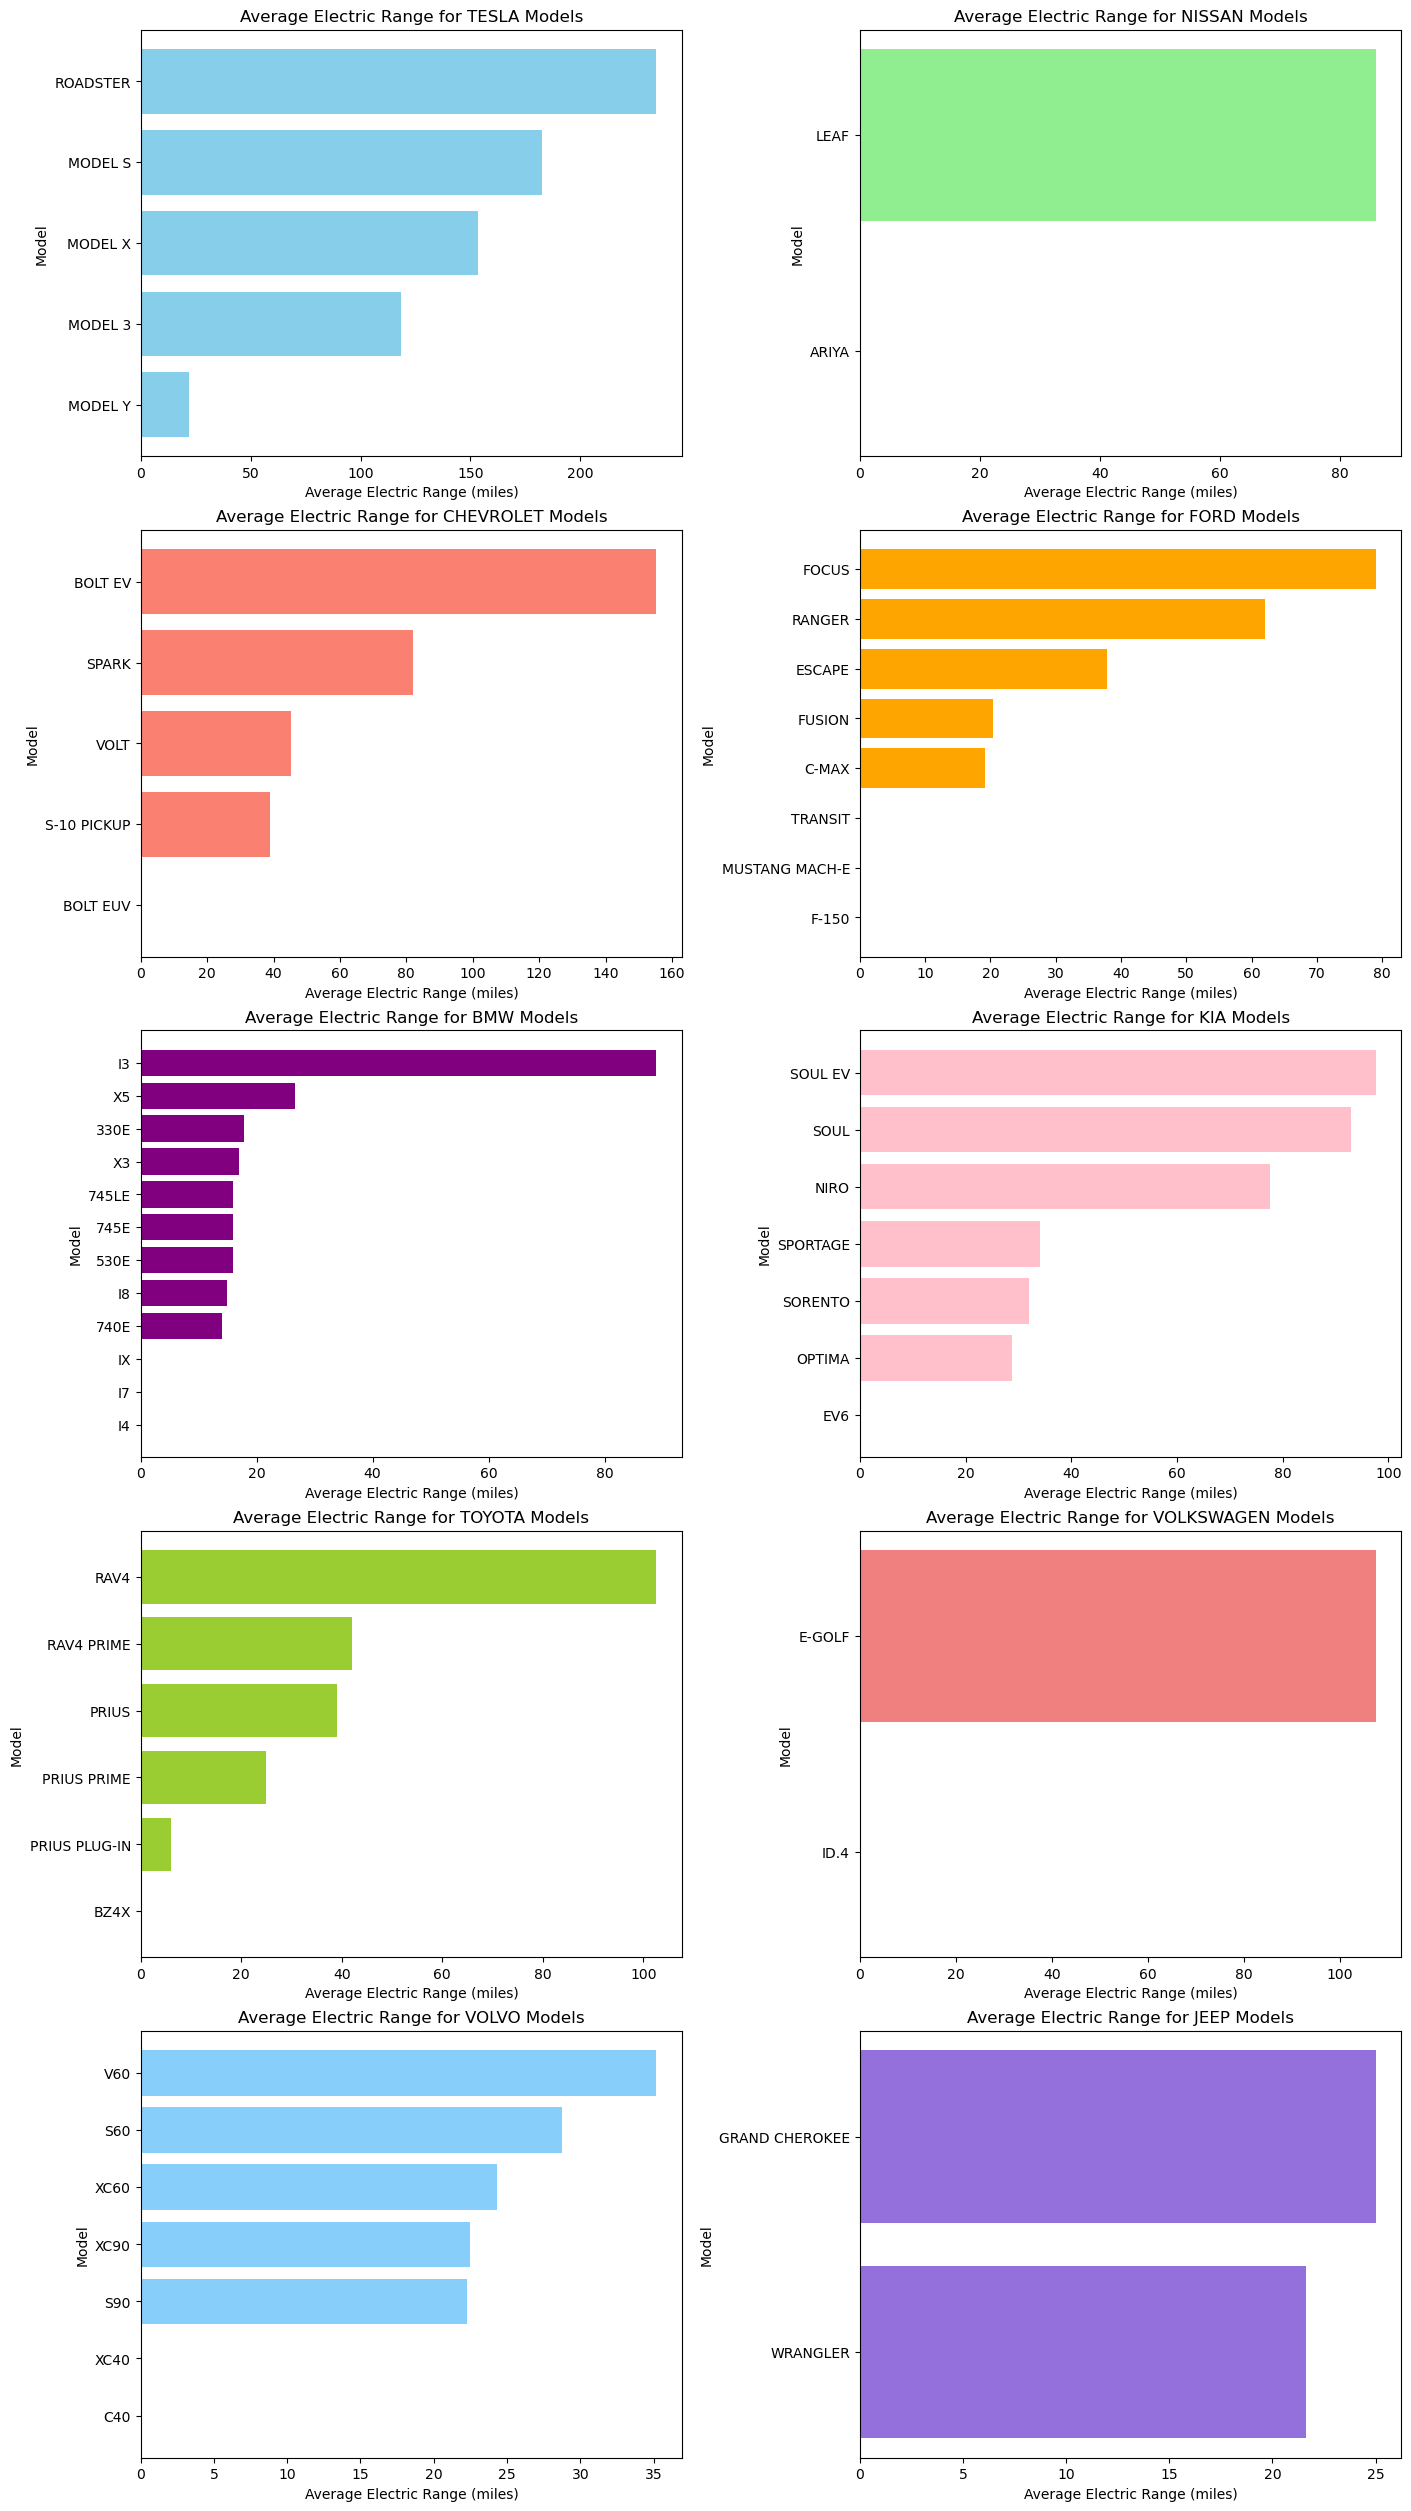

In [6]:
# Plot 3: Average Electric Range for different car 'Make' with corresponding 'Models'
# First, let's determine the top makes by overall count from the ev_data
top_makes = df['Make'].value_counts().head(10).index.tolist()

# Now let's filter the data for these top makes and get the average electric range for each model
top_makes_models_range = df[df['Make'].isin(top_makes)]

# Create a color list with a unique color for each make
colors = [
    'skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 
    'pink', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumpurple'
]

# Ensure we have enough colors for the number of makes
if len(colors) < len(top_makes):
    colors = colors * (len(top_makes) // len(colors) + 1)

# Determine the layout of the subplots
num_makes = len(top_makes)
ncols = 2  # Number of columns
nrows = num_makes // ncols + (num_makes % ncols > 0)  # Calculate the number of rows needed

# Create a figure with subplots side by side
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

for i, make in enumerate(top_makes):
    # Filter for the current make and group by 'Model' to get average range
    make_data = top_makes_models_range[top_makes_models_range['Make'] == make]
    model_range_avg = make_data.groupby('Model')['Electric Range'].mean().sort_values()

    # Plot on the respective subplot
    ax = axes_flat[i]
    ax.barh(model_range_avg.index, model_range_avg.values, color=colors[i])
    ax.set_title(f'Average Electric Range for {make} Models')
    ax.set_xlabel('Average Electric Range (miles)')
    ax.set_ylabel('Model')

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes_flat[j])

# Show the plot
plt.show()


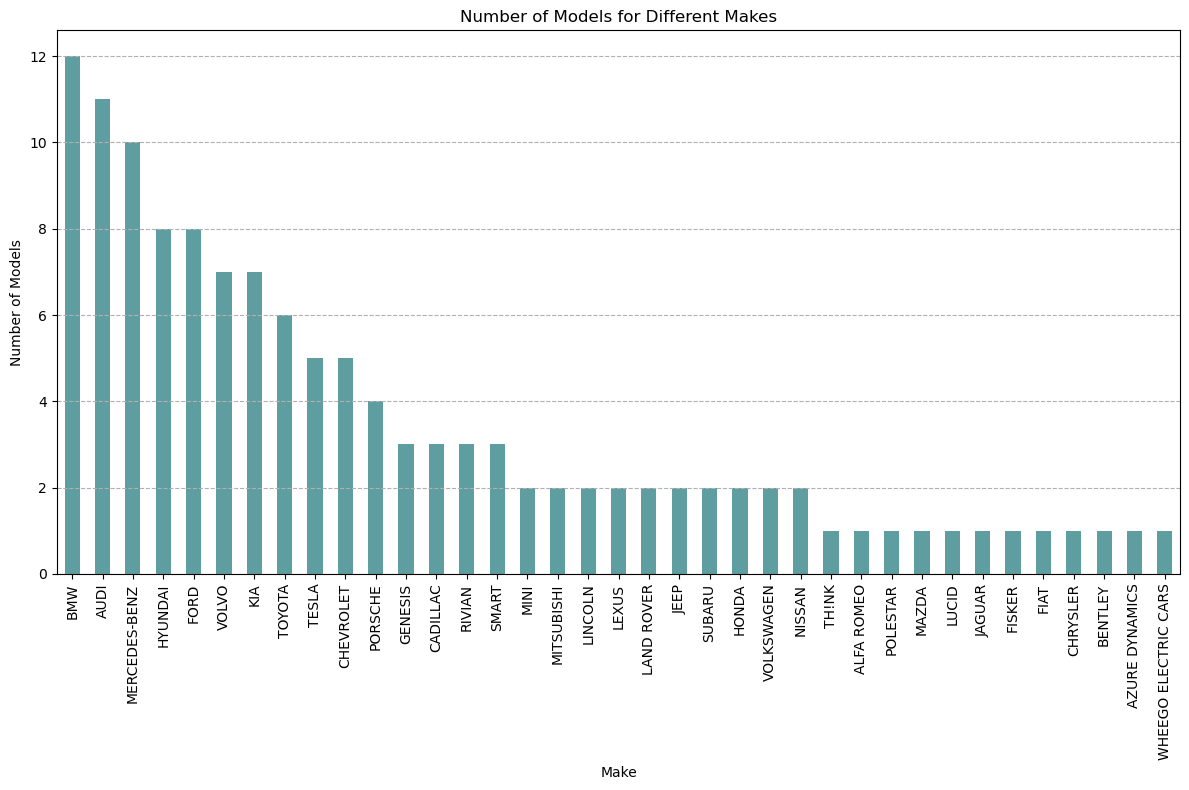

In [7]:
# Plot 4: Number of Models for each 'Make'
# Calculate the number of models for each make
model_count_by_make = df.groupby('Make')['Model'].nunique().sort_values(ascending=False)

# Create a bar plot for the number of models by make
plt.figure(figsize=(12, 8))
model_count_by_make.plot(kind='bar', color='cadetblue')
plt.title('Number of Models for Different Makes')
plt.xlabel('Make')
plt.ylabel('Number of Models')
plt.xticks(rotation='vertical')  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


In [8]:
# Map 5: Top Model Location in 2023 and later
# Group by 'Postal Code' and count the total number of vehicles in each postal code
postal_code_counts = df.groupby('Postal Code').size().reset_index(name='Count').astype(int)

# Display the resulting DataFrame
postal_code_counts

# Sort the postal_code_counts DataFrame to get the top 10 postal codes
top_postal_codes = postal_code_counts.sort_values(by='Count', ascending=False).head(10)

# Display the top 10 postal codes with the highest count
top_postal_codes

,Postal Code,Count
319,98052,3942
291,98012,2814
306,98033,2667
284,98004,2498
286,98006,2489
346,98115,2404
369,98188,2177
330,98074,2171
329,98072,2132
312,98040,2106


In [9]:
# Assuming 'Year' is the column name that indicates the year of registration
# Filter out rows where the 'State' is not 'WA' and the year is 2023 or later
wa_ev_data_2023 = df[(df['State'] == 'WA') & (df['Model Year'] >= 2023)]

# Determine the top model in Washington state for 2023 or later
top_model_wa_2023 = wa_ev_data_2023['Model'].value_counts().head(1).index.tolist()

# Filter the data to include only this top model
top_model_data_wa_2023 = wa_ev_data_2023[wa_ev_data_2023['Model'].isin(top_model_wa_2023)]

# Extract the 'Vehicle Location' for this top model
top_model_locations_wa_2023 = top_model_data_wa_2023[['Model', 'Vehicle Location']]

top_model_locations_wa_2023


,Model,Vehicle Location
17,MODEL Y,POINT (-122.1876761 47.820517)
73,MODEL Y,POINT (-117.90431 48.547075)
98,MODEL Y,POINT (-122.1876761 47.820517)
179,MODEL Y,POINT (-122.209285 47.71124)
195,MODEL Y,POINT (-122.12302 47.67668)
...,...,...
153793,MODEL Y,POINT (-122.6011039 48.85324)
153794,MODEL Y,POINT (-122.12302 47.67668)
153801,MODEL Y,POINT (-122.45493 48.76809)
153812,MODEL Y,POINT (-122.31327 47.32329)


In [10]:
# Convert the 'Vehicle Location' strings to Shapely Point objects
import shapely.wkt

# Function to convert WKT string to a Point object
def wkt_to_point(wkt_string):
    try:
        return shapely.wkt.loads(wkt_string)
    except:
        return None

# Apply the function to the 'Vehicle Location' column
top_model_locations_wa_2023['geometry'] = top_model_locations_wa_2023['Vehicle Location'].apply(wkt_to_point)

# Drop rows where geometry conversion failed (if any)
top_model_locations_wa_2023 = top_model_locations_wa_2023.dropna(subset=['geometry'])

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(top_model_locations_wa_2023, geometry='geometry')

gdf.head()  # Display the first few rows of the GeoDataFrame

C:\Users\Leo\AppData\Local\Temp\ipykernel_16312\1478249305.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_model_locations_wa_2023['geometry'] = top_model_locations_wa_2023['Vehicle Location'].apply(wkt_to_point)


,Model,Vehicle Location,geometry
17,MODEL Y,POINT (-122.1876761 47.820517),POINT (-122.18768 47.82052)
73,MODEL Y,POINT (-117.90431 48.547075),POINT (-117.90431 48.54707)
98,MODEL Y,POINT (-122.1876761 47.820517),POINT (-122.18768 47.82052)
179,MODEL Y,POINT (-122.209285 47.71124),POINT (-122.20928 47.71124)
195,MODEL Y,POINT (-122.12302 47.67668),POINT (-122.12302 47.67668)


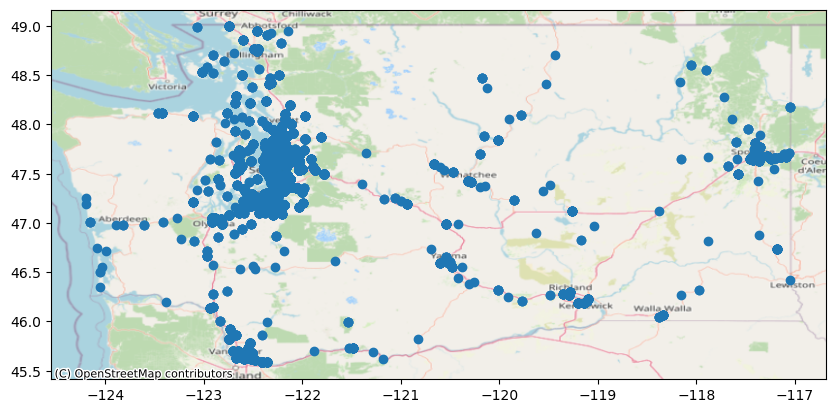

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
gdf = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, legend=True)
ctx.add_basemap(ax=ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)  # Adjust zoom level as needed
plt.show()

In [12]:
# Missing Value Detection
missing_values = df.isnull().sum()
print(missing_values)

# Delete the rows with missing value and named new df as "PD_cleaned"
PD_cleaned = df.dropna()
print(PD_cleaned.info())
print(PD_cleaned.describe())
PD_cleaned

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 339
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
Counties                       

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,2746.0,4.0,22.0
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3009.0,7.0,4.0
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,3009.0,7.0,21.0
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,3007.0,2.0,16.0
5,1G1FW6S00H,Kitsap,Seabeck,WA,98380.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,35.0,125032974,POINT (-122.847462 47.63836),PUGET SOUND ENERGY INC,5.303509e+10,848.0,6.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153824,5YJ3E1EB0K,King,Bellevue,WA,98004.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,41.0,125333288,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,3009.0,9.0,42.0
153825,1N4AZ0CP0D,San Juan,Eastsound,WA,98245.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,POINT (-122.907229 48.7016716),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10,3211.0,2.0,43.0
153826,5YJSA1E27H,Spokane,Spokane,WA,99223.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...,5.306301e+10,3214.0,5.0,9.0
153827,1G1FW6S03P,King,Seatac,WA,98188.0,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,244720059,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.0,9.0,36.0


In [13]:
# Determine the top 10 'Make' and filter for model year from 2010 onwards
top_makes = PD_cleaned['Make'].value_counts().head(10).index.tolist()
df_filtered = PD_cleaned[(PD_cleaned['Make'].isin(top_makes)) & (PD_cleaned['Model Year'] >= 2010)]

# Adjust the 'Model Year' to show only the last two digits
df_filtered['Model Year'] = df_filtered['Model Year'].apply(lambda x: int(str(x)[-2:]))

# Grouping data for the line plot
grouped_data = df_filtered.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

# Creating scales and axes for the line plot
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
ax_x = bqplot.Axis(label='Model Year', scale=x_sc)
ax_y = bqplot.Axis(label='Number of Vehicles', scale=y_sc, orientation='vertical', label_offset='+50px')

# Creating color scale
color_scale = bqplot.ColorScale(colors=bqplot.CATEGORY10)

# Creating lines for each top 'Make'
lines = [bqplot.Lines(x=grouped_data[grouped_data['Make'] == make]['Model Year'], 
                      y=grouped_data[grouped_data['Make'] == make]['Count'], 
                      scales={'x': x_sc, 'y': y_sc}, 
                      labels=[make], 
                      display_legend=True, 
                      colors=[color_scale.colors[i % len(color_scale.colors)]]) 
         for i, make in enumerate(top_makes)]

# Creating the line plot figure
fig = bqplot.Figure(marks=lines, axes=[ax_x, ax_y], title='Number of Vehicles by Top 10 Makes and Model Year', legend_location='top-right')
fig.layout.width = '500px'
fig.layout.height = '500px'

# Function to update the bar plot based on selected 'Make'
def update_bar_plot(make, year_range=None):
    
    make_data = PD_cleaned[PD_cleaned['Make'] == make]
    
    # Filter data based on the selected year range, if provided
    if year_range is not None:
        start_year, end_year = year_range
        make_data = make_data[(make_data['Model Year'] >= start_year + 2000) & (make_data['Model Year'] <= end_year + 2000)]

    model_data = make_data.groupby('Model').size().reset_index(name='Sales')
    
    # Check if model_data is empty
    if model_data.empty:
        # Handle the empty data case (e.g., display a message or an empty plot)
#         print("No data available for the selected criteria")
        return bqplot.Figure()

    x_sc_bar = bqplot.OrdinalScale()
    y_sc_bar = bqplot.LinearScale()

    ax_x_bar = bqplot.Axis(scale=x_sc_bar, label='Model')
    ax_y_bar = bqplot.Axis(scale=y_sc_bar, orientation='vertical', label='Number of Vehicles', label_offset='+50px')

    # Find the index of the selected make to get the color
    make_index = top_makes.index(make)
    make_color = color_scale.colors[make_index % len(color_scale.colors)]

    bars = bqplot.Bars(x=model_data['Model'], y=model_data['Sales'], 
                       scales={'x': x_sc_bar, 'y': y_sc_bar}, 
                       colors=[make_color])

    bar_fig = bqplot.Figure(marks=[bars], axes=[ax_x_bar, ax_y_bar], title=f'Number of Model(s) for {make}')
    bar_fig.layout.width = '500px'
    bar_fig.layout.height = '500px'
    return bar_fig

# Create a dropdown to select 'Make'
make_dropdown = ipywidgets.Dropdown(
    options=top_makes,
    value=top_makes[0],
    description='Select Make:',
    disabled=False,
)

# Function to update plots based on dropdown selection
def update_plots(make):
    for line in lines:
        line.visible = line.labels[0] == make
    return update_bar_plot(make)

# Dropdown change event
def on_dropdown_change(change):
    make_selected = change['new']
    updated_bar_plot = update_plots(make_selected)
    bar_plot_container.children = [updated_bar_plot]

make_dropdown.observe(on_dropdown_change, names='value')

# Create a BrushIntervalSelector for the x-axis
brush_selector = BrushIntervalSelector(scale=x_sc, marks=lines)

# Define an update function for the Brush Selector
def on_brush_change(change):
    if brush_selector.selected is not None and len(brush_selector.selected) == 2:
        selected_range = brush_selector.selected
        selected_make = make_dropdown.value
        # Convert selected range to model years
        selected_years = [int(year) for year in selected_range]
        updated_bar_plot = update_bar_plot(selected_make, year_range=selected_years)
        bar_plot_container.children = [updated_bar_plot]

# Link the Brush Selector to the update function
brush_selector.observe(on_brush_change, names='selected')

# Add the Brush Selector to the line plot
fig.interaction = brush_selector

# Initial plots
initial_line_plot = fig
initial_bar_plot = update_plots(top_makes[0])

# Assemble the dashboard
bar_plot_container = ipywidgets.VBox([initial_bar_plot])
dashboard = ipywidgets.VBox([make_dropdown, ipywidgets.HBox([fig, bar_plot_container])])
dashboard

C:\Users\Leo\AppData\Local\Temp\ipykernel_16312\2615583733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Model Year'] = df_filtered['Model Year'].apply(lambda x: int(str(x)[-2:]))


### Dataset 2 

In [14]:
#Unzip and load the second dataset
ev_title_registration_zip_path = 'Electric_Vehicle_Title_and_Registration_Activity.zip'
zip_folder = zipfile.ZipFile(ev_title_registration_zip_path, 'r')
zip_folder.extractall('ev_title_registration')
ev_title_registration_files = zip_folder.namelist()
ev_title_registration_path = 'ev_title_registration/' + ev_title_registration_files[0]
ev_title_registration_df = pd.read_csv(ev_title_registration_path)
# ev_title_registration_df = pd.read_csv('C:/Users/Duand/Desktop/IS 445/project/Electric_Vehicle_Title_and_Registration_Activity.csv')

# Display the column names of both datasets
ev_title_registration_columns = ev_title_registration_df.columns.tolist()

ev_title_registration_columns

['Clean Alternative Fuel Vehicle Type',
 'VIN (1-10)',
 'DOL Vehicle ID',
 'Model Year',
 'Make',
 'Model',
 'Vehicle Primary Use',
 'Electric Range',
 'Odometer Reading',
 'Odometer Code',
 'New or Used Vehicle',
 'Sale Price',
 'Sale Date',
 'Base MSRP',
 'Transaction Type',
 'DOL Transaction Date',
 'Transaction Year',
 'County',
 'City',
 'State of Residence',
 'Postal Code',
 '2015 HB 2778 Exemption Eligibility',
 '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Meets 2019 HB 2042 Electric Range Requirement',
 'Meets 2019 HB 2042 Sale Date Requirement',
 'Meets 2019 HB 2042 Sale Price/Value Requirement',
 '2019 HB 2042: Battery Range Requirement',
 '2019 HB 2042: Purchase Date Requirement',
 '2019 HB 2042: Sale Price/Value Requirement',
 'Electric Vehicle Fee Paid',
 'Transportation Electrification Fee Paid',
 'Hybrid Vehicle Electrification Fee Paid',
 '2020 Census Tract',
 'Legislative District',
 'Electric Utility']

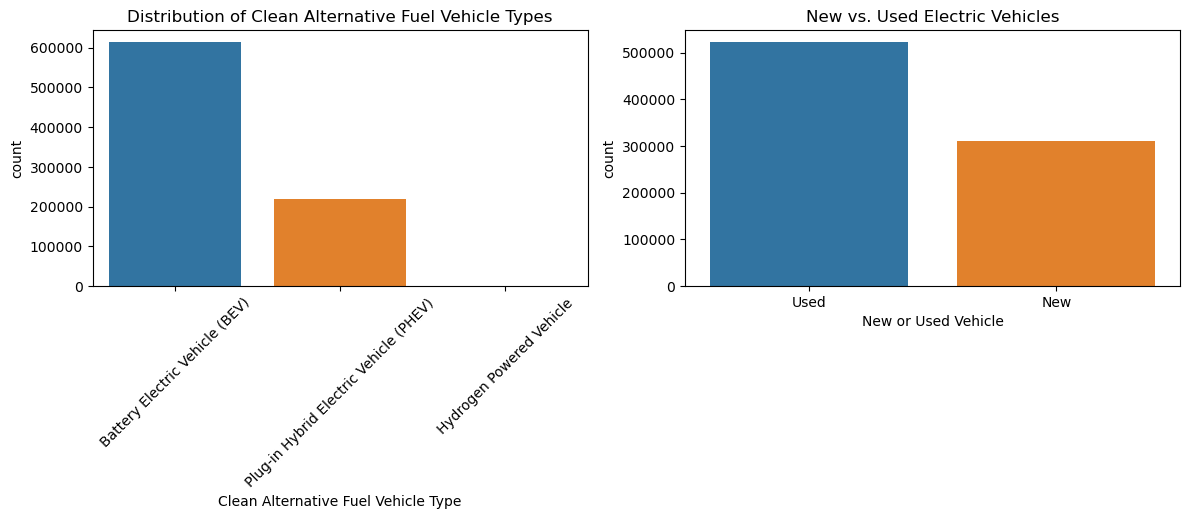

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(12,8))

# Plot 1: Distribution of Clean Alternative Fuel Vehicle Type
plt.subplot(2, 2, 1)
sns.countplot(x='Clean Alternative Fuel Vehicle Type', data=ev_title_registration_df)
plt.title('Distribution of Clean Alternative Fuel Vehicle Types')
plt.xticks(rotation=45)

# Plot 2: New vs. Used Vehicles
plt.subplot(2, 2, 2)
sns.countplot(x='New or Used Vehicle', data=ev_title_registration_df)
plt.title('New vs. Used Electric Vehicles')

# Adjust layout
plt.tight_layout()
plt.show()

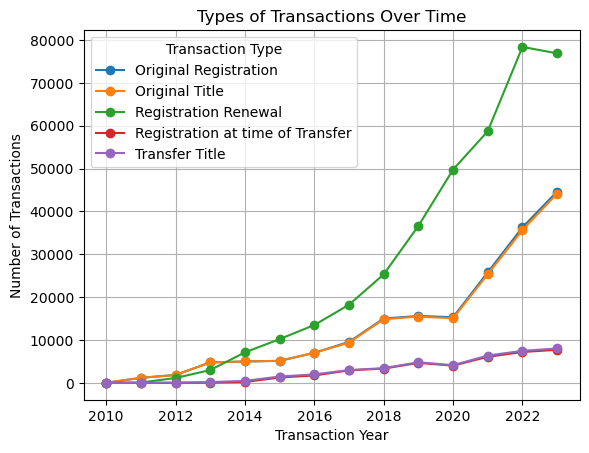

In [16]:
# Grouping by transaction year and transaction type
transactions_over_time = ev_title_registration_df.groupby(['Transaction Year', 'Transaction Type']).size().unstack(fill_value=0)

# Creating a line plot for transaction types over time
transactions_over_time.plot(kind='line', marker='o')
plt.title('Types of Transactions Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Number of Transactions')
plt.legend(title='Transaction Type')
plt.grid(True)
plt.show()

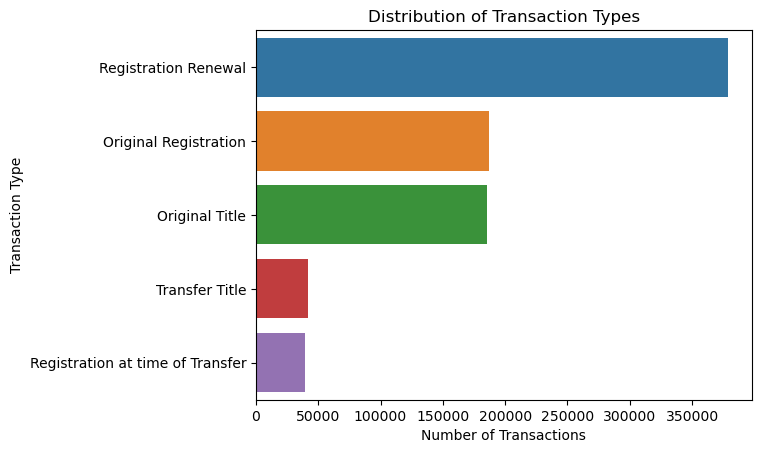

In [17]:
# Filtering the relevant column
transaction_types = ev_title_registration_df['Transaction Type']

# Creating a count plot for transaction types
sns.countplot(y=transaction_types, order=transaction_types.value_counts().index)
plt.title('Distribution of Transaction Types')
plt.xlabel('Number of Transactions')
plt.ylabel('Transaction Type')
plt.show()